# Convolutional Neural Networks usando Keras e CIFAR-10

### 1. Carregando a base CIFAR-10 (imagens rotuladas em macro categorias)

### Label Description

- 0	airplane
- 1	automobile
- 2	bird
- 3	cat
- 4	deer
- 5	dog
- 6	frog
- 7	horse
- 8	ship
- 9	truck


https://keras.io/api/datasets/cifar10/

Para saber mais:
https://keras.io/api/

In [ ]:
#!pip install keras

In [1]:
import keras
from keras.datasets import cifar10

In [2]:
# Realizando download da base de dados

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
# Use este código caso o de cima possa gerar algum erro.

#import tensorflow as tf
#(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
#ssl._create_default_https_context = ssl._create_unverified_context #import ssl

In [3]:
# Visualizando as dimensões

print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


### 2. Visualizando as primeiras 36 imagens do dataset de treinamento

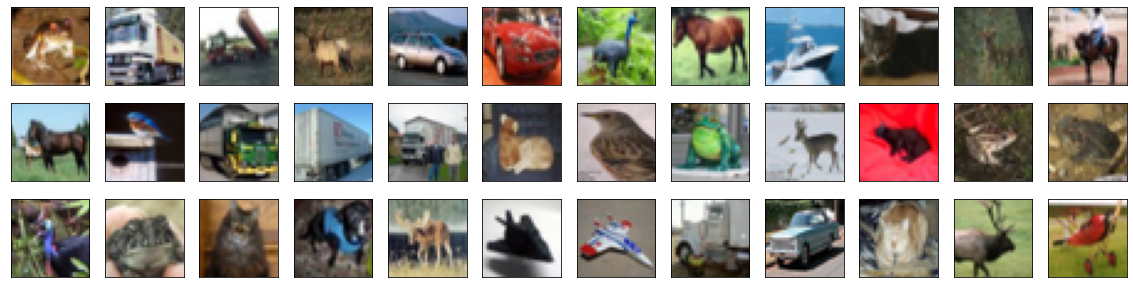

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(train_images[i]))

In [5]:
#Visualizando os pixels das imagens (RGB)

print(train_images[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [6]:
from PIL import Image # A Biblioteca de imagens Python PIL é usada para trabalhar com imagens em Python.

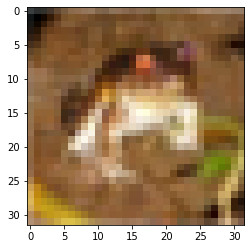

In [7]:
%matplotlib inline
imagem = train_images[0]                             #acessando a posição 0
imagem = Image.fromarray(imagem).resize((32, 32), 1) # resize
imagem = np.array(imagem)                            # re-transform into an array
plt.imshow(imagem)                                   #mostrando a imagem

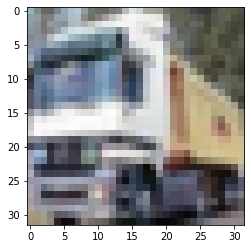

In [8]:
%matplotlib inline
imagem = train_images[1]                             #acessando a posição 1
imagem = Image.fromarray(imagem).resize((32, 32), 1) # resize
imagem = np.array(imagem)                            # re-transform into an array
plt.imshow(imagem)                                   #mostrando a imagem

### 3. Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [9]:
# redimensionamento [0,255] --> [0,1]
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [10]:
print(train_images[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


### 4.  Dividindo o dataset em treinamento, teste e validação

In [11]:
from keras.utils import np_utils  #Converte um vetor de classe (inteiros) em uma matriz de classe binária
from IPython.display import Image #Para visualizar imagens explicativas
from keras.utils.np_utils import to_categorical #Para realizar o tratamento de variáveis categoricas

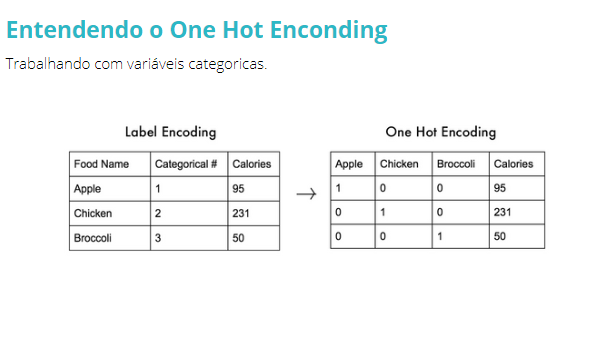

In [12]:
Image(filename='OneHotEnconding.png') 

In [12]:
# "one-hot encode" aplicado aos rótulos
num_classes = len(np.unique(train_labels))
train_labels= keras.utils.np_utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.np_utils.to_categorical(test_labels, num_classes)

In [13]:
# Acessando o rótulo da posição 0 (sapo)
print(train_labels[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [14]:
# divindo dataset de treinamento em treinamento, teste e validação
(train_images, x_valid) = train_images[5000:], train_images[:5000] #treinamento
(train_labels, y_valid) = train_labels[5000:], train_labels[:5000] # teste

# impressão da forma do conjunto de treino
print('train_images shape:', train_images.shape)
print('train_labels shape:', train_labels.shape)
print('x_valid shape:', x_valid.shape)
print('y_valid shape:', y_valid.shape)

# impressão do número de imagens nos datasets de treinamento, teste e validação
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

train_images shape: (45000, 32, 32, 3)
train_labels shape: (45000, 10)
x_valid shape: (5000, 32, 32, 3)
y_valid shape: (5000, 10)
45000 train samples
10000 test samples
5000 validation samples


### 5. Definindo a arquitetura do modelo

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(10)

model = Sequential()

#1º camada
model.add(Conv2D(filters=10, #filtros
                 kernel_size=3, #número do kernel
                 strides=(1, 1), #stride na imagem
                 padding='same', #bordas com zeros
                 activation='relu',  #funçaõ de ativação
                 input_shape=(32, 32, 3))) # tamanho da imagem 

model.add(MaxPooling2D(pool_size=2))

#2º camada
model.add(Conv2D(filters=5, 
                 kernel_size=3, 
                 strides=(1, 1), 
                 padding='same', 
                 activation='sigmoid'))

#3º camada
model.add(Conv2D(filters=3, 
                 kernel_size=3, 
                 strides=(1, 1),
                 padding='same', 
                 activation='tanh')) 

model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(100, activation='relu'))

model.add(Dropout(0.4))

model.add(Dense(num_classes, activation='softmax'))

# tentem com outras funções de ativação (tanh, softmax, sigmoid, relu)
# mais informações em https://keras.io/activations/
# Padding = "valid"significa sem preenchimento. 
# Padding = "same" resulta no preenchimento com zeros uniformemente à esquerda/direita ou para cima/para baixo da entrada.

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 10)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 5)         455       
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 3)         138       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 3)          0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 3)           0

In [16]:
num_classes

10

### 6. Compilando o modelo

In [17]:
# compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
# mais informações em https://keras.io/losses/
# mais informações em https://keras.io/optimizers/
# mais informações em https://keras.io/metrics/

# O RMSprop é uma extensão do Adagrad que lida com as taxas de aprendizado radicalmente decrescentes de Adagrad. 
# O RMSprop divide a taxa de aprendizado por uma média exponencialmente decrescente de gradientes quadrados.
# Esse otimizador geralmente é uma boa escolha para redes neurais recorrentes (RNN).

model.compile(loss='categorical_crossentropy', #binary_crossentropy, sparse_categorical_crossentropy, categorical_crossentropy
              optimizer='rmsprop', #SGD, adam, rmsprop
              metrics=['accuracy'])

### 7. Treinando o modelo

In [18]:
from keras.callbacks import ModelCheckpoint #salvar nosso modelo  

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)


hist = model.fit(train_images, train_labels, batch_size=64, epochs=15,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

# tentem mudar o número de épocas de treinamento e verificar o comportamento de nosso algoritmo

Epoch 1/15

Epoch 1: val_loss improved from inf to 1.76704, saving model to model.weights.best.hdf5
704/704 - 24s - loss: 1.9694 - accuracy: 0.2828 - val_loss: 1.7670 - val_accuracy: 0.3484 - 24s/epoch - 35ms/step
Epoch 2/15

Epoch 2: val_loss improved from 1.76704 to 1.59874, saving model to model.weights.best.hdf5
704/704 - 25s - loss: 1.7409 - accuracy: 0.3733 - val_loss: 1.5987 - val_accuracy: 0.4180 - 25s/epoch - 35ms/step
Epoch 3/15

Epoch 3: val_loss did not improve from 1.59874
704/704 - 24s - loss: 1.6479 - accuracy: 0.4001 - val_loss: 1.6071 - val_accuracy: 0.4132 - 24s/epoch - 34ms/step
Epoch 4/15

Epoch 4: val_loss improved from 1.59874 to 1.45512, saving model to model.weights.best.hdf5
704/704 - 24s - loss: 1.6042 - accuracy: 0.4163 - val_loss: 1.4551 - val_accuracy: 0.4806 - 24s/epoch - 34ms/step
Epoch 5/15

Epoch 5: val_loss did not improve from 1.45512
704/704 - 24s - loss: 1.5668 - accuracy: 0.4326 - val_loss: 1.5280 - val_accuracy: 0.4496 - 24s/epoch - 34ms/step
Epoc

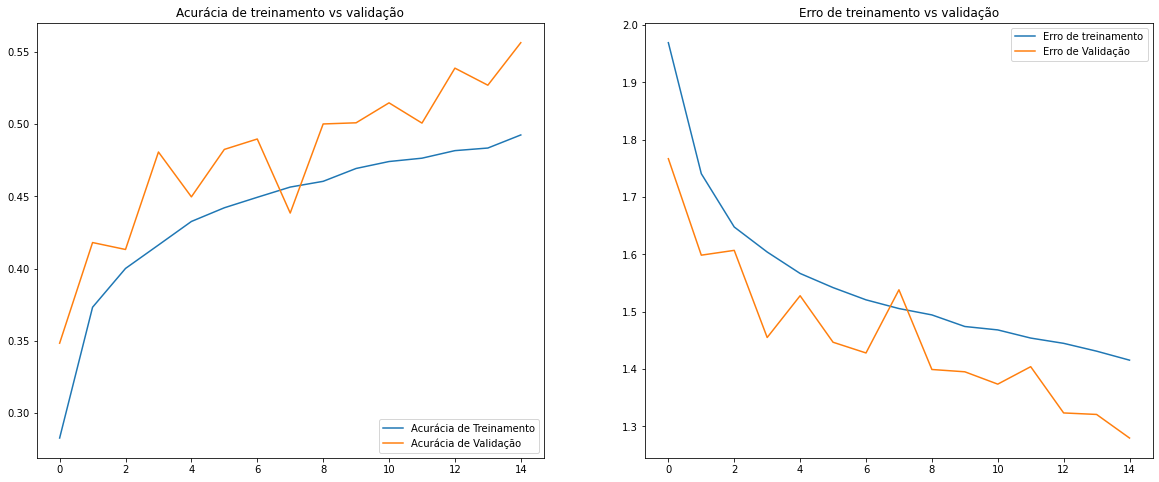

In [19]:
# Visualizando os resultados em gráficos:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epoch = 15
epochs_range = range(epoch)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treinamento')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de treinamento vs validação')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Erro de treinamento')
plt.plot(epochs_range, val_loss, label='Erro de Validação')
plt.legend(loc='upper right')
plt.title('Erro de treinamento vs validação')
plt.show()

### 8. Carregando o modelo com a melhor precisão de validação

In [20]:
# carregando os configurações que geraram a melhor precisão de validação
model.load_weights('model.weights.best.hdf5')

### 9. Cálculo da precisão de classificação no dataset de testes

In [21]:
# avaliar e imprimir a precisão do teste
score = model.evaluate(test_images, test_labels, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.5396000146865845


### 10. Visualizar algumas predições

As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.

In [22]:
# obtendo previsões no conjunto de testes
y_hat = model.predict(test_images)

# definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['aviao', 'automovel', 'passaro', 'gato', 'veado', 'cachorro', 'sapo', 'cavalo', 'navio', 'caminhao']

313/313 [==============================] - 3s 8ms/step


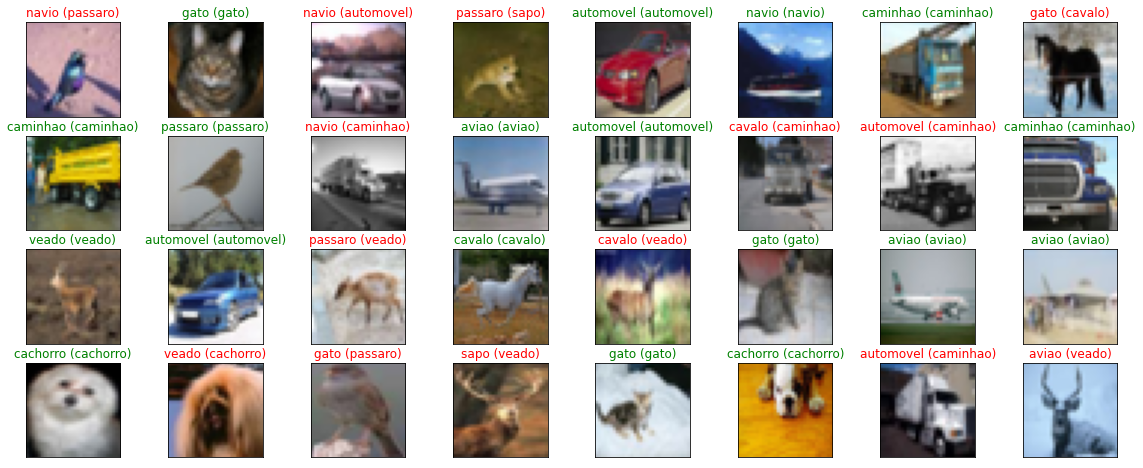

In [23]:
# plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(test_images.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_images[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(test_labels[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho


## Desafio! 

Vamos tentar modificar a rede neural convolucional para obter uma acurácia acima de 50%.

## Novo teste de CNN

In [16]:
from tensorflow.keras import layers

model = tf.keras.Sequential()

# Camada convolucional 1
model.add(layers.Conv2D(32, 
                        (3, 3), 
                        activation='relu', 
                        padding='same', 
                        input_shape=(32, 32, 3)))

model.add(layers.Conv2D(32, 
                        (3, 3), 
                        activation='relu', 
                        padding='same'))

model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# Camada convolucional 2
model.add(layers.Conv2D(64, 
                        (3, 3), 
                        activation='relu', 
                        padding='same'))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# Camada convolucional 3
model.add(layers.Conv2D(128,
                        (3, 3),
                        activation='relu',
                        padding='same'))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# Camada de flatten
model.add(layers.Flatten())

# Camadas densas
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_classes, activation='softmax'))

In [17]:
from tensorflow.keras.optimizers import SGD

# Compile the model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Essa rede demorou 30 minutos para executar 

from keras.callbacks import ModelCheckpoint #salvar nosso modelo  

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)


hist = model.fit(train_images, train_labels, epochs=15,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)


Epoch 1/15

Epoch 1: val_loss improved from inf to 2.01094, saving model to model.weights.best.hdf5
1407/1407 - 209s - loss: 2.2055 - accuracy: 0.1695 - val_loss: 2.0109 - val_accuracy: 0.2536 - 209s/epoch - 148ms/step
Epoch 2/15

Epoch 2: val_loss improved from 2.01094 to 1.73405, saving model to model.weights.best.hdf5
1407/1407 - 210s - loss: 1.9415 - accuracy: 0.2862 - val_loss: 1.7341 - val_accuracy: 0.3646 - 210s/epoch - 150ms/step
Epoch 3/15

Epoch 3: val_loss improved from 1.73405 to 1.61175, saving model to model.weights.best.hdf5
1407/1407 - 218s - loss: 1.7277 - accuracy: 0.3642 - val_loss: 1.6118 - val_accuracy: 0.4076 - 218s/epoch - 155ms/step
Epoch 4/15

Epoch 4: val_loss improved from 1.61175 to 1.47820, saving model to model.weights.best.hdf5
1407/1407 - 224s - loss: 1.6022 - accuracy: 0.4106 - val_loss: 1.4782 - val_accuracy: 0.4596 - 224s/epoch - 159ms/step
Epoch 5/15

Epoch 5: val_loss improved from 1.47820 to 1.34799, saving model to model.weights.best.hdf5
1407/140

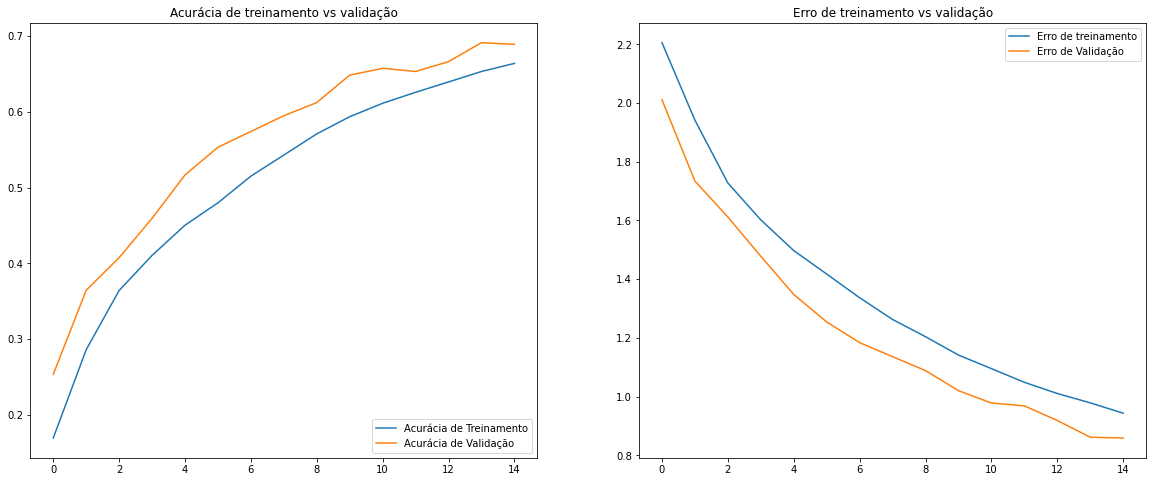

In [19]:
# Visualizando os resultados em gráficos:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epoch = 15
epochs_range = range(epoch)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treinamento')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de treinamento vs validação')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Erro de treinamento')
plt.plot(epochs_range, val_loss, label='Erro de Validação')
plt.legend(loc='upper right')
plt.title('Erro de treinamento vs validação')
plt.show()

In [20]:
# avaliar e imprimir a precisão do teste
score = model.evaluate(test_images, test_labels, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6945000290870667


In [21]:
# obtendo previsões no conjunto de testes
y_hat = model.predict(test_images)

# definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['aviao', 'automovel', 'passaro', 'gato', 'veado', 'cachorro', 'sapo', 'cavalo', 'navio', 'caminhao']

313/313 [==============================] - 10s 30ms/step


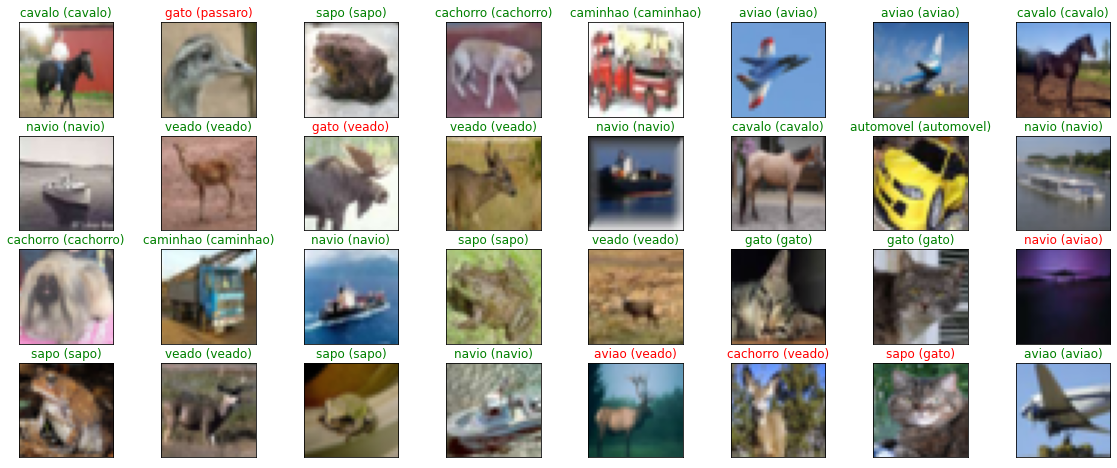

In [22]:
# plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(test_images.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_images[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(test_labels[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho
